# PART-1

## 1.1 Import the dataset.

In [161]:
%tensorflow_version 2.x
import tensorflow as tf

#Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

#PART-1
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape
#PART-2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tensorflow.keras import layers
from keras.layers import BatchNormalization, Dropout
from keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential

In [3]:
#Connecting to Gdrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/CNN_Project2

/content/gdrive/My Drive/CNN_Project2


Loading the given .npy file & exploring one sample of data

In [5]:
path = './Part 1- Train data - images.npy'
np.load(path,allow_pickle=True)[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

From the above example, 2 Face coordinate points are given along with Width, height.

In [6]:
#Preparing TrainDataSet
trainData = []
for i in  (np.load(path,allow_pickle=True)):
  trainData.append(i)

## 1.2. Create features (images) and labels (mask) using that data.

In [7]:
#Calculating the no.of images & faces given
totalfaces = 0
count=1
df = pd.DataFrame(columns=['Image','height','width','x1','y1','x2','y2','label'])

for image in trainData:
    img = image[0]
    metadata = image[1]
    for data in metadata:
        height = data['imageHeight']
        width = data['imageWidth']
        points = data['points']
        label = data['label']
        if 'Face' in data['label']:
            x1 = round(width*points[0]['x'])
            y1 = round(height*points[0]['y'])
            x2 = round(width*points[1]['x'])
            y2 = round(height*points[1]['y'])
            #cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
            totalfaces += 1
            df.loc[len(df.index)] = ['./images/face_image_{}.jpg'.format(count), height, width,x1,y1,x2,y2,label]
    cv2.imwrite('./images/face_image_{}.jpg'.format(count),img)
    count += 1
    

Lets print the no.of images given along with overall faces count in it.

In [9]:
print("Total images : {} ".format(count-1))
print("Total images with faces : {}".format(len(trainData)))
print("Total Faces Detected: {}".format(totalfaces))

Total images : 409 
Total images with faces : 409
Total Faces Detected: 1132


So we have atleast one face, in all images given.

In [10]:
#Explore the class label
#Face seem to be the only class given in our dataset
df['label'].describe()

count       1132
unique         1
top       [Face]
freq        1132
Name: label, dtype: object

Lets load few examples

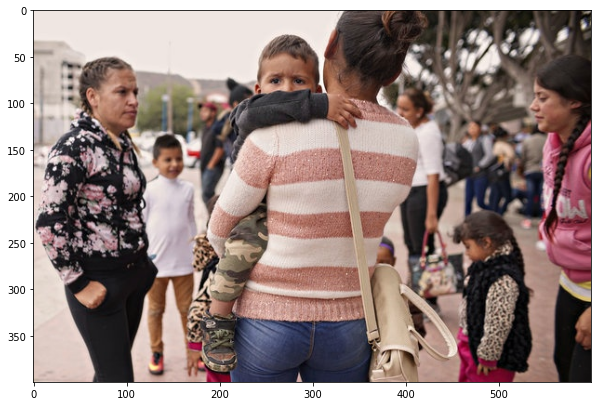

In [11]:
face1 = cv2.imread("./images/face_image_25.jpg")
plt.figure(figsize=(10,10))
plt.imshow(face1)
plt.show()

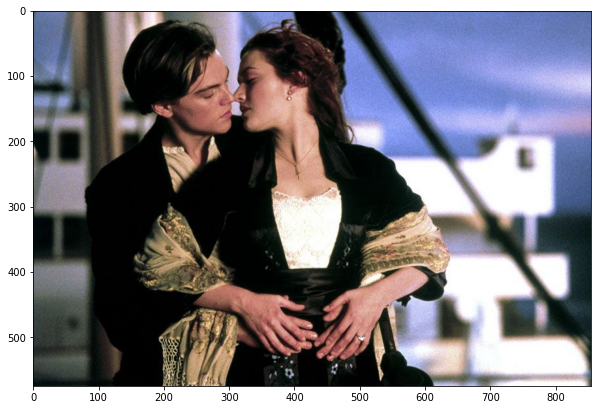

In [24]:
face1 = cv2.imread("./images/face_image_77.jpg")
plt.figure(figsize=(10,10))
plt.imshow(face1)
plt.show()

Saving the dataframe contents to a CSV file

In [25]:
df.to_csv('./images/dataset.csv',index =False)

In [26]:
#From str to numeric
df[["height", "width","x1","y1","x2","y2"]] = df[["height", "width","x1","y1","x2","y2"]].apply(pd.to_numeric)

In [27]:
#Verifying the data once
pd.read_csv('./images/dataset.csv')

Image  height  width   x1   y1   x2   y2     label
0       ./images/face_image_1.jpg     333    650   56  102  112  151  ['Face']
1       ./images/face_image_1.jpg     333    650  379   97  428  156  ['Face']
2       ./images/face_image_2.jpg     697   1280  903  162  985  252  ['Face']
3       ./images/face_image_3.jpg     240    460  216   12  279   80  ['Face']
4       ./images/face_image_3.jpg     240    460  289    2  343   74  ['Face']
...                           ...     ...    ...  ...  ...  ...  ...       ...
1127  ./images/face_image_409.jpg     493    656  164  122  187  150  ['Face']
1128  ./images/face_image_409.jpg     493    656  318  115  346  159  ['Face']
1129  ./images/face_image_409.jpg     493    656  389  156  407  177  ['Face']
1130  ./images/face_image_409.jpg     493    656  507  204  526  226  ['Face']
1131  ./images/face_image_409.jpg     493    656  527  254  558  309  ['Face']

[1132 rows x 8 columns]

Dataset looks good.


Verify the unique count once

In [28]:
print(df.Image.unique().shape[0], df.shape[0])

409 1132


In [29]:
#Shape of the DataFrame
df.shape

(1132, 8)

Lets draw rectangles around the faces using given coordinate points.

In [30]:
def show_image(image_id):
  bbox = df[df['Image'] == image_id ]
  img_path = os.path.join(image_id)
  image = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
  image /= 255.0
  image2 = image
  for idx, row in bbox.iterrows():
    cv2.rectangle(image, (row.x1, row.y1), (row.x2, row.y2), (255,255,255), 2)
  plt.figure(figsize =(10,10))
  plt.imshow(image)
  plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


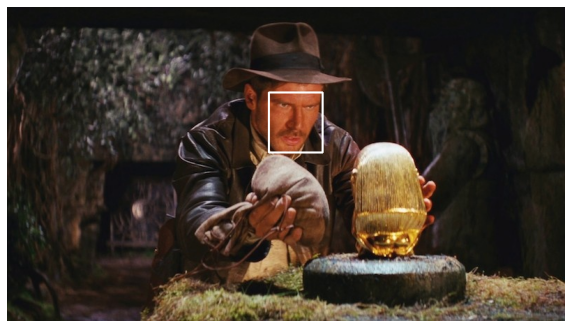

In [31]:
show_image(df.Image.unique()[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


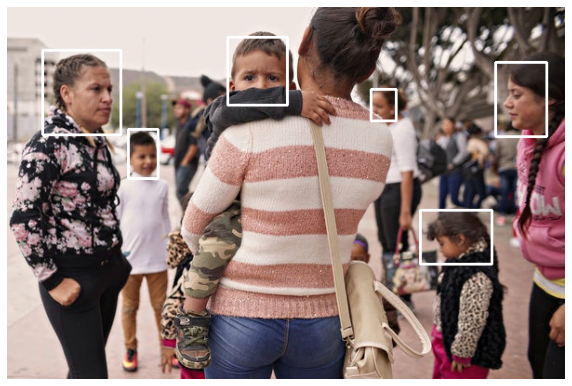

In [34]:
show_image(df.Image.unique()[24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


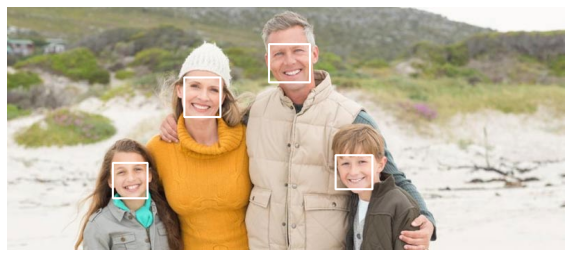

In [33]:
show_image(df.Image.unique()[42])

Lets split our data into train & test datasets

In [ ]:
#Just reading the required columns
Dataset_df = df[['Image','x1','y1','x2','y2']]
print(Dataset_df.shape)

(1132, 5)


In [66]:
# split train, val 80%-20%
unique_files = Dataset_df.Image.unique()
train_files = set(np.random.choice(unique_files, int(len(unique_files) * 0.95), replace = False))
train_df = Dataset_df[Dataset_df.Image.isin(train_files)]
test_df = Dataset_df[~Dataset_df.Image.isin(train_files)] 

In [67]:
#880 images goes into Train
#252 images goes into Test
print(train_df.shape[0], test_df.shape[0])

1073 59


In [68]:
#Printing the shapes
print(train_df.shape)
print(test_df.shape)

(1073, 5)
(59, 5)


Printing the first row in both datasets

In [41]:
train_df[:1]

Image  x1   y1   x2   y2
0  ./images/face_image_1.jpg  56  102  112  151

In [42]:
test_df[:1]

Image   x1   y1   x2   y2
2  ./images/face_image_2.jpg  903  162  985  252

Read Images as predictors & coordinates as target variables

In [69]:
X_train = train_df.loc[:, train_df.columns == 'Image']
y_train = train_df.loc[:, train_df.columns != 'Image']
X_val = test_df.loc[:, train_df.columns == 'Image']
y_val = test_df.loc[:, train_df.columns != 'Image']

In [70]:
#Printing the shapes of the datasets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1073, 1)
(1073, 4)
(59, 1)
(59, 4)


Lets print the first rown in those ndarrays

In [45]:
X_train[:1]

Image
0  ./images/face_image_1.jpg

In [46]:
y_train[:1]

x1   y1   x2   y2
0  56  102  112  151

In [47]:
X_val[:1]

Image
2  ./images/face_image_2.jpg

In [48]:
y_val[:1]

x1   y1   x2   y2
2  903  162  985  252

Preprocessing the data to fed to the pretrained Models


In [71]:
IMAGE_SIZE=224
X_data = []

for i, f in enumerate(X_train['Image']):
  img = Image.open(f)  # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_data.append(preprocess_input(np.array(img, dtype=np.float32))) # Convert to float32 array
  img.close()

In [72]:
#Converting to ndarray from list
X_train = np.array(X_data)
print(X_train.shape)

(1073, 224, 224, 3)


In [73]:
#Converting to ndarray from list
y_train = np.array(y_train)
print(y_train.shape)

(1073, 4)


The preprocess for validatation set as well.

In [74]:
X_data = []

for i, f in enumerate(X_val['Image']):
  img = Image.open(f)  # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_data.append(preprocess_input(np.array(img, dtype=np.float32))) # Convert to float32 array
  img.close()

In [75]:
X_val = np.array(X_data)
print(X_val.shape)

(59, 224, 224, 3)


In [76]:
y_val = np.array(y_val)
print(y_val.shape)

(59, 4)


### 1.3.1 Design a face mask detection model.

Using MobileNet preptrained model.

In [93]:
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=7, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

### 1.3.2 Design your own Dice Coe"icient and Loss function.

In [94]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [95]:
def IoU(y_true, y_pred):
    iou = tf.py_function(IOU, [y_true, y_pred], Tout=tf.float32)
    return iou

### 1.3.3 Train, tune and test the model.

In [96]:
model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [100]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

In [99]:
# Use earlystopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)
import tensorflow
# Fit the model
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[callback])
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
34/34 [==============================] - 33s 971ms/step - loss: 58541.1367 - IoU: 0.3033 - val_loss: 47538.2969 - val_IoU: 0.1821
Epoch 2/100
34/34 [==============================] - 33s 957ms/step - loss: 59052.6992 - IoU: 0.3064 - val_loss: 46735.7812 - val_IoU: 0.1810
Epoch 3/100
34/34 [==============================] - 32s 952ms/step - loss: 58772.1914 - IoU: 0.3127 - val_loss: 44319.2969 - val_IoU: 0.1831
Epoch 4/100
34/34 [==============================] - 32s 948ms/step - loss: 58632.6523 - IoU: 0.3123 - val_loss: 43337.5312 - val_IoU: 0.1793
Epoch 5/100
34/34 [==============================] - 32s 949ms/step - loss: 58626.2578 - IoU: 0.3182 - val_loss: 42721.7031 - val_IoU: 0.1774
Epoch 6/100
34/34 [==============================] - 32s 951ms/step - loss: 58549.2656 - IoU: 0.3065 - val_loss: 42630.9375 - val_IoU: 0.1812
Epoch 7/100
34/34 [==============================] - 32s 949ms/step - loss: 58650.6797 - IoU: 0.3089 - val_loss: 41994.6055 - val_IoU: 0.1798
Epoch 

### 1.3.4 Evaluate the model using testing data.

In [101]:
model.evaluate(X_val, y_val)

2/2 [==============================] - 2s 768ms/step - loss: 43409.1797 - IoU: 0.1795


[43409.1796875, 0.17949999868869781]

In [91]:
get_acc = history.history['IoU']
value_acc = history.history['val_IoU']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']


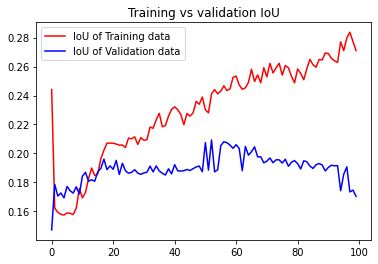

<Figure size 432x288 with 0 Axes>

In [69]:
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='IoU of Training data')
plt.plot(epochs, value_acc, 'b', label='IoU of Validation data')
plt.title('Training vs validation IoU')
plt.legend(loc=0)
plt.figure()
plt.show()

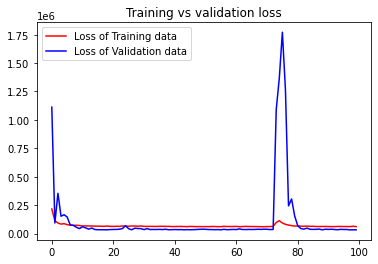

<Figure size 432x288 with 0 Axes>

In [92]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

- Loss is kinda of saturated
- No change in the loss with more epochs

### 1.4 Use the “Prediction image” as an input to your designed model and display the output of the image.

In [102]:

# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
filename = './Part 1Test Data - Prediction Image.jpeg'
unscaled = cv2.imread(filename) # Original image for display

image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (224, 224, 3)
-------------------------------
Size of scaled input:  (224, 224, 3)


In [108]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox
region

array([193.35399, 144.12262, 288.24988, 265.4649 ], dtype=float32)

In [129]:
x2 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y2 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 499.5, 499.5, -0.5)

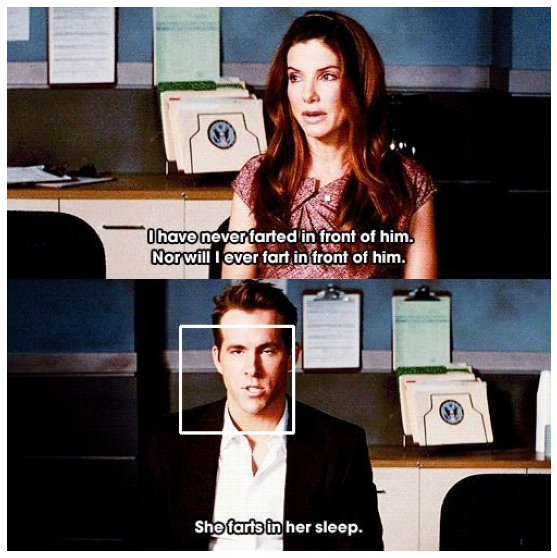

In [137]:
img_path = os.path.join(filename)
image = cv2.imread(img_path, cv2.IMREAD_COLOR).astype(np.float32)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /= 255.0
image2 = image
    
#y1=region[0]
#x1=region[1]
#y2=region[2]
#x2=region[3]
        
cv2.rectangle(image, (x1, y1), (x2, y2), (255,255,255), 2)
plt.figure(figsize =(10,10))
plt.imshow(image)
plt.axis('off')


Thats predicted one face, but there's the other one in picture.


Lets see how the training image looks like.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


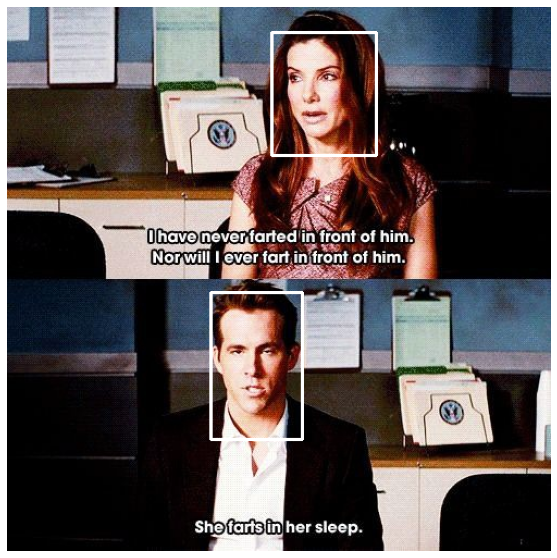

In [135]:
show_image(df.Image.unique()[5])

So it has proper 2 faces boxes given.

Lets switch it ResNet and see.

### ResNet50

In [114]:
img_size=224
tf.keras.backend.clear_session()
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, 3),
                                          weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [115]:
len(model.layers)

175

In [116]:
for layer in model.layers:
    layer.trainable = False

In [117]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [118]:
#get Output layer of Pre-trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#Add Dropout
x = tf.keras.layers.Dropout(0.5)(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Batch Norm
x = tf.keras.layers.BatchNormalization()(x)

In [119]:
#Regression
bbox_output = tf.keras.layers.Dense(4 , activation='linear', name='reg_op')(x)

In [120]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[bbox_output]) #Output layer added

In [121]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse'},
                    loss_weights={'reg_op':1},
                    metrics={'reg_op':[IoU]})

In [122]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [132]:
history=final_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
34/34 [==============================] - 153s 5s/step - loss: 429822.8438 - IoU: 0.3841 - val_loss: 136633.0781 - val_IoU: 0.5130
Epoch 2/10
34/34 [==============================] - 151s 4s/step - loss: 428627.7188 - IoU: 0.3874 - val_loss: 135567.6250 - val_IoU: 0.4875
Epoch 3/10
34/34 [==============================] - 151s 4s/step - loss: 426865.0312 - IoU: 0.3708 - val_loss: 134599.6250 - val_IoU: 0.4780
Epoch 4/10
34/34 [==============================] - 151s 4s/step - loss: 424084.3438 - IoU: 0.3790 - val_loss: 132435.8281 - val_IoU: 0.4406
Epoch 5/10
34/34 [==============================] - 151s 4s/step - loss: 419797.2188 - IoU: 0.3592 - val_loss: 129589.8438 - val_IoU: 0.4766
Epoch 6/10
34/34 [==============================] - 152s 4s/step - loss: 414555.4375 - IoU: 0.3676 - val_loss: 129076.1328 - val_IoU: 0.4374
Epoch 7/10
34/34 [==============================] - 151s 4s/step - loss: 406808.3750 - IoU: 0.3350 - val_loss: 129474.9062 - val_IoU: 0.4114
Epoch 8/10
34

In [133]:
get_acc = history.history['IoU']
value_acc = history.history['val_IoU']
get_loss = history.history['loss']
validation_loss = history.history['val_loss']

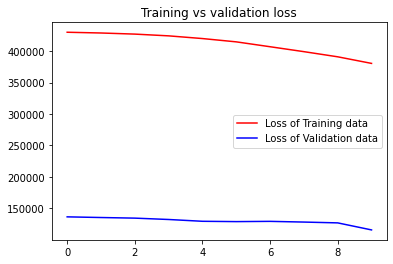

<Figure size 432x288 with 0 Axes>

In [134]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

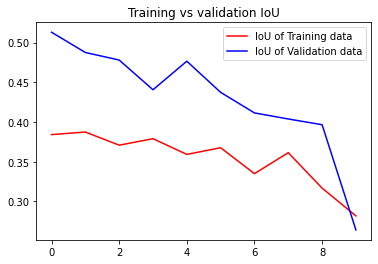

<Figure size 432x288 with 0 Axes>

In [135]:
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='IoU of Training data')
plt.plot(epochs, value_acc, 'b', label='IoU of Validation data')
plt.title('Training vs validation IoU')
plt.legend(loc=0)
plt.figure()
plt.show()

Even with Resnet, the loss is saturated
Ans IoU is coming down with no.of epochs.
This is strange.

Lets try without any pretrained models & just for testing.

In [156]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=(img_size,img_size, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(4,activation='linear'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
#model.compile(loss='mse',optimizer=adam)

In [157]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

In [160]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
34/34 [==============================] - 106s 3s/step - loss: 241353.5469 - IoU: 0.1656 - val_loss: 43642.6367 - val_IoU: 0.1675
Epoch 2/10
34/34 [==============================] - 105s 3s/step - loss: 241015.6875 - IoU: 0.1771 - val_loss: 77831.7656 - val_IoU: 0.1048
Epoch 3/10
34/34 [==============================] - 105s 3s/step - loss: 247121.8750 - IoU: 0.1599 - val_loss: 39762.8125 - val_IoU: 0.1698
Epoch 4/10
34/34 [==============================] - 106s 3s/step - loss: 246084.3281 - IoU: 0.1790 - val_loss: 37798.5156 - val_IoU: 0.1716
Epoch 5/10
34/34 [==============================] - 105s 3s/step - loss: 240481.5781 - IoU: 0.1588 - val_loss: 41604.2461 - val_IoU: 0.1319
Epoch 6/10
34/34 [==============================] - 105s 3s/step - loss: 224090.4062 - IoU: 0.1451 - val_loss: 76680.5781 - val_IoU: 0.1124
Epoch 7/10
34/34 [==============================] - 105s 3s/step - loss: 210327.0938 - IoU: 0.1476 - val_loss: 49105.4141 - val_IoU: 0.1382
Epoch 8/10
34/34 [==

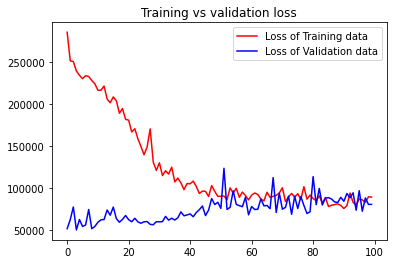

<Figure size 432x288 with 0 Axes>

In [175]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Training loss is coming down & goes into overfitting model with more no.of epochs.
But the validation loss isn't improving much

### Conclusions:

- Dataset isn't enough, have very few images 
- We couldn't achieve IoU more than 0.25.
- With higher resolutions such as 192,224  we see that we are losing the plot & getting below par IoU.
- Even with different models like MobileNet, ResNet50, we didn't get better score.

# PART-2

## 2. 1 Load the dataset and create the metadata.

In [ ]:
#Extracting the zip file
images_zip_path = "./Part 3 - Aligned Face Dataset from Pinterest.zip"
from zipfile import ZipFile
with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

## 2.2 Check some samples of metadata.

Each image in the data set has a same of (299, 299, 3)


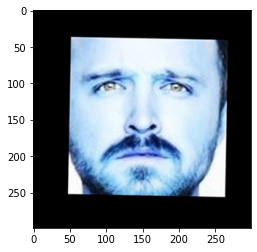

In [ ]:
img = cv2.imread('./PINS/pins_Aaron Paul/Aaron Paul98_257.jpg')
print("Each image in the data set has a same of {0}".format(img.shape))

plt.imshow(img)
plt.show()

In [ ]:
#Classes
directory = './PINS/'
Name=[]
for file in os.listdir(directory):
    #Excluding the 'pins_'
    Name+=[file[5:]]
print(Name)
print(len(Name))

['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco', 'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt', 'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz', 'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt', 'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco', 'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke', 'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow', 'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg', 'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington', 'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams', 'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter', 'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ', 'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso', 'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper', 'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies', 'Scarlett Johansson', 'Sebastian Stan', 'Sophie Turner', 'Stephen Amell', 'Sundar Pichai', 'Thomas Middle

We have 100 classes here.

In [ ]:
#Extracting the classes & images
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [ ]:
#Reading the images & folder names as class names
dataset=[]
testset=[]
count=0
for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(120,120))
        image=img_to_array(image)
        image=image/255.0
        t+=1
        if t<=100:
            dataset.append([image,count])
        else:
            testset.append([image,count])
    count+=1

In [ ]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [ ]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

Spliting the Train, Test datasets

In [ ]:
#Split Train-Test
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.3,random_state=7)

Prinitng the shapes of Test & Train datasets

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6410, 120, 120, 3)
(2748, 120, 120, 3)
(6410, 100)
(2748, 100)


### ImageNet model (Transfer learning)

In [ ]:
#Data Augumentation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
#Loading pretrained model
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(120,120,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
201/201 [==============================] - 56s 160ms/step - loss: 4.5150 - accuracy: 0.0273 - val_loss: 4.2369 - val_accuracy: 0.0375
Epoch 2/100
201/201 [==============================] - 28s 139ms/step - loss: 4.0671 - accuracy: 0.0658 - val_loss: 3.8734 - val_accuracy: 0.1008
Epoch 3/100
201/201 [==============================] - 28s 138ms/step - loss: 3.8175 - accuracy: 0.0972 - val_loss: 3.6967 - val_accuracy: 0.1019
Epoch 4/100
201/201 [==============================] - 28s 138ms/step - loss: 3.6341 - accuracy: 0.1335 - val_loss: 3.5615 - val_accuracy: 0.1379
Epoch 5/100
201/201 [==============================] - 29s 146ms/step - loss: 3.5069 - accuracy: 0.1540 - val_loss: 3.4115 - val_accuracy: 0.1641
Epoch 6/100
201/201 [==============================] - 28s 139ms/step - loss: 3.4136 - accuracy: 0.1690 - val_loss: 3.3930 - val_accuracy: 0.1543
Epoch 7/100
201/201 [==============================] - 29s 147ms/step - loss: 3.3169 - accuracy: 0.1842 - val_loss: 3.3295 -

In [ ]:
y_pred=model.predict(X_test)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(y_test,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.35      0.26      0.30        27
           1       0.58      0.44      0.50        25
           2       0.35      0.23      0.27        31
           3       0.53      0.83      0.64        23
           4       0.64      0.36      0.46        25
           5       0.25      0.04      0.06        27
           6       0.50      0.38      0.43        16
           7       0.11      0.03      0.05        32
           8       0.56      0.28      0.37        36
           9       0.46      0.35      0.40        17
          10       0.11      0.05      0.07        37
          11       0.44      0.12      0.20        32
          12       0.54      0.23      0.33        30
          13       0.23      0.09      0.13        32
          14       0.05      0.11      0.07        28
          15       0.50      0.14      0.22        28
          16       0.38      0.12      0.19        24
          17       0.14    

- Scores have been good enough for few classes
- Few classes sclores are less than 10%, which is bad prediction rate.
- Fewer classes have more than 50% scores, which is good.

Lets plot the loss vs Score graphs

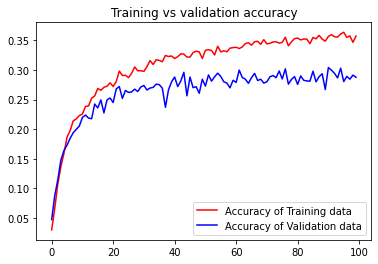

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

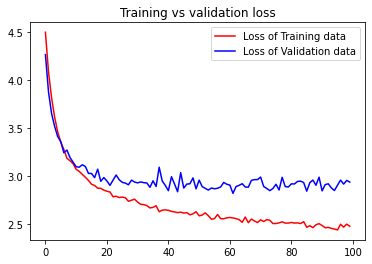

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

 - Train accuracy is improving at slow pace from 30+ epochs
 - Validation accuracy isn't going up high from 30+ epochs & is kinda saturated
 - Training the model for more than 30 pochs is of no use.
 - Train loss is going down at slow pace after 50+ pochs
 - Val loss kind of going up again from 20+ epochs & very unstable
 - So this model isn't learning much after 30-40+ epochs overall.

#### Lets predict few images & see how our model is performing

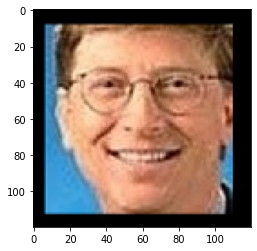

In [ ]:
def mapper(value):
    return reverse_mapping[value]

image=load_img("./PINS/pins_bill gates/bill gates6.jpg",target_size=(120,120))
plt.imshow(image)
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)

print("Prediction is {}.".format(move_name))

Prediction is bill gates.


Bill gates is correctly predicted. So Lets see how it performs on the given test images.

### Lets predict the given Test images

Prediction is Dwayne Johnson.


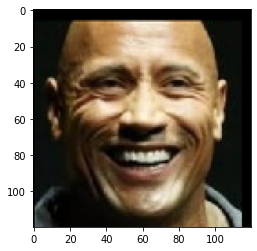

In [ ]:
image=load_img("./Part 2 - Test Image - Dwayne Johnson4.jpg",target_size=(120,120))
plt.imshow(image)
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Dwayne Johnson is corrected predicted.

Prediction is Benedict Cumberbatch.


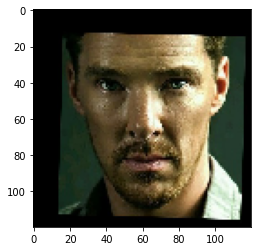

In [ ]:
image=load_img("./Part 2- Test Image - Benedict Cumberbatch9.jpg",target_size=(120,120))
plt.imshow(image)
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Benedict Cumberbatch is correctly predicted.

Lets see the accuracy score.

In [ ]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(1612, 120, 120, 3)
(1612, 100)


In [ ]:
ANS=tlabels0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.2313895781637717


The avg score is near 25%. So the model is not good enought.

Lets use pretrained models & given weights. 

## Creating the datasets to use on Pretrained Models

In [ ]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(directory)

In [ ]:
print('metadata shape :', metadata.shape)

metadata shape : (10770,)


In [ ]:
type(metadata[1500]), metadata[1500].image_path()

(__main__.IdentityMetadata, './PINS/pins_Chris Pratt/Chris Pratt95.jpg')

In [ ]:
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

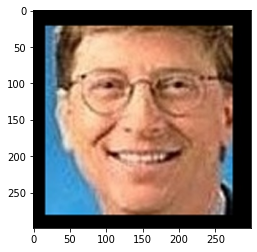

In [ ]:
img=load_image('./PINS/pins_bill gates/bill gates6.jpg')
plt.imshow(img)

## 2. 3 Using given pretrained weights Part 3 - vgg_face_weights.h5

In [ ]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

Lets load the given weights

In [ ]:
model = vgg_face()
model.load_weights('./Part 3 - vgg_face_weights.h5')

In [ ]:
#Verify the first layer of model & last but one layer
model.layers[0], model.layers[-2]

(<keras.layers.convolutional.ZeroPadding2D at 0x7fe15e489b90>,
 <keras.layers.core.Flatten at 0x7fe15f582fd0>)

In [ ]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [ ]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_2_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

## 2.4 Generate Embedding vectors for each face in the dataset.

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.0121803535, numpy.ndarray, numpy.float32)

In [ ]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(0.0026275755, 0.009114857, -0.0060367608)

In [ ]:
total_images = len(metadata)
print('total_images :', total_images)

total_images : 10758


In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [ ]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (10758, 2622)


In [ ]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([ 0.01218035, -0.00123486,  0.00262758, ..., -0.00280751,
        -0.00603676,  0.00586424]),
 array([-0.00421403,  0.01583113, -0.00308628, ..., -0.02859097,
         0.01365032,  0.02741204]),
 (2622,))

In [ ]:
embeddings[8275]

array([ 0.01045277, -0.00776186, -0.00116331, ..., -0.01615843,
       -0.0084859 ,  0.01456354])

## 2.5 Build distance metrics for identifying the distance between two given images.

Calculating the squared L2 distance between 2 vectors

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Lets verify the distance between similar & disimilar faces

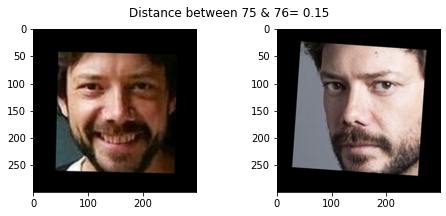

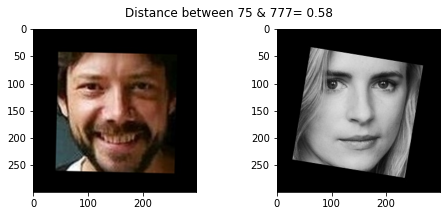

In [ ]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(75, 76)
show_pair(75, 777)

Distance between smiling professor & angry professor is less, compared to the actress.

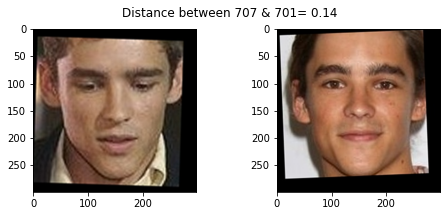

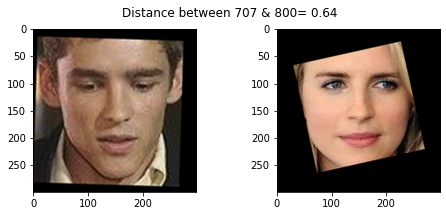

In [ ]:
show_pair(707, 701)
show_pair(707, 800)

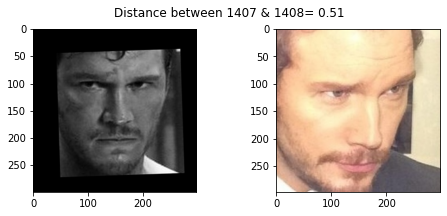

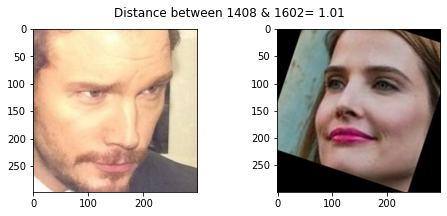

In [ ]:
show_pair(1407, 1408)
show_pair(1408, 1602)

So the clearly the distance between the similar faces is less.


So lets build a model that minimizes the distance between similar faces & maximizes distance between disimilar faces

##### Creating the required train & test datasets

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]

#test labels
y_test = targets[test_idx]

In [ ]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9562,2622)
y_train shape : (9562,)
X_test shape : (1196,2622)
y_test shape : (1196,)


In [ ]:
y_test[0], y_train[988]

('pins_Aaron Paul', 'pins_Cameron Monaghan')

In [ ]:
len(np.unique(y_test)), len(np.unique(y_train))

(100, 100)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [ ]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 0  0  0 ... 99 99 99]
y_test_encoded :  [ 0  0  0 ... 99 99 99]


In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std.shape

(9562, 2622)

In [ ]:
X_test_std = scaler.transform(X_test)

In [ ]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (9562,2622)
y_train_encoded shape : (9562,)
X_test_std shape : (1196,2622)
y_test_encoded shape : (1196,)


## 2.6 Use PCA for dimensionality reduction.

We do have like 2622 features & trying to build a model with just 120. Lets see.

In [ ]:
#Transforming the train features
pca = PCA(n_components=120)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## 2.7 Build an SVM classifier in order to map each image to its right person

In [ ]:
#Building the Model
clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predicting
y_predict = clf.predict(X_test_pca)

In [ ]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 0  0  0 ... 99 99 99]
y_test_encoded :  [ 0  0  0 ... 99 99 99]


In [ ]:
y_predict_encoded = le.inverse_transform(y_predict)

In [ ]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


In [ ]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (1196,)
y_test_encoded shape :  (1196,)


In [ ]:
y_test_encoded[32:49]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])

In [ ]:
# Find the classification accuracy
accuracy_score(y_test_encoded, y_predict)

0.927257525083612

Accuracy is near 95%. This is the good model.

##### Lets predict few images & check

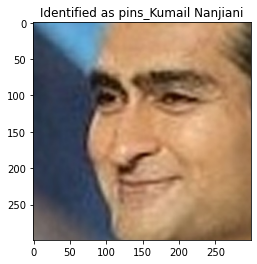

In [ ]:
example_idx = 401

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

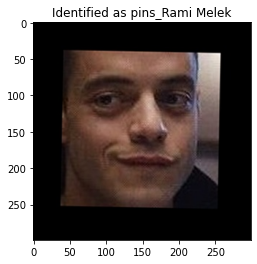

In [ ]:
example_idx = 550

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

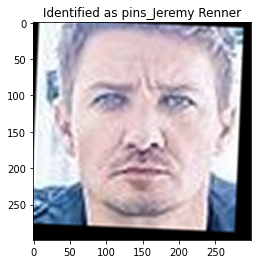

In [ ]:
example_idx = 317

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

###### 2.8 Import the the test image. Display the image. Use the SVM trained model to predict the face.

### Lets predict the given Test images

Prediction is Dwayne Johnson.


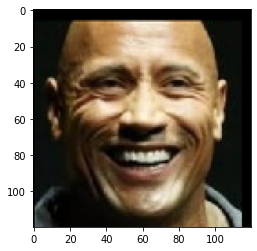

In [ ]:
image=load_img("./Part 2 - Test Image - Dwayne Johnson4.jpg",target_size=(120,120))
plt.imshow(image)
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
prediction=clf.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print("Prediction is {}.".format(move_name))

Prediction is Benedict Cumberbatch.


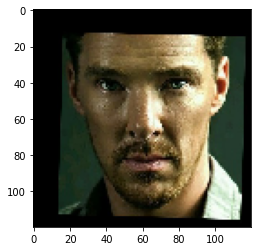

In [ ]:
image=load_img("./Part 2- Test Image - Benedict Cumberbatch9.jpg",target_size=(120,120))
plt.imshow(image)
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] 
example_identity =  y_predict_encoded[example_idx] 

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print("Prediction is {}.".format(move_name))

### Conclusions


- Dataset is huge & have enough no.of images to build the good model.
- We have seen that 25% accuracy with ImageNet model & seen VGG face model outperforms here.
- Generated embeddings for all images using pre-trained VGG Face model.
- Used "Squared L2 distance" to calculate the distance and reducing the image vectors to 128, we managed to get best accuracy score.
- Used SVM classifier to predict the celebrity in a given image and achived a 96.455% accuracy.